In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf),
('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [2]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.896
VotingClassifier 0.896


In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.912


In [4]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [5]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),
n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [6]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

In [7]:
bag_clf.oob_decision_function_

array([[0.42857143, 0.57142857],
       [0.345     , 0.655     ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04891304, 0.95108696],
       [0.35051546, 0.64948454],
       [0.01092896, 0.98907104],
       [0.98802395, 0.01197605],
       [0.98857143, 0.01142857],
       [0.81621622, 0.18378378],
       [0.        , 1.        ],
       [0.75144509, 0.24855491],
       [0.82564103, 0.17435897],
       [0.97222222, 0.02777778],
       [0.03553299, 0.96446701],
       [0.        , 1.        ],
       [0.98930481, 0.01069519],
       [0.93236715, 0.06763285],
       [1.        , 0.        ],
       [0.02272727, 0.97727273],
       [0.32417582, 0.67582418],
       [0.9112426 , 0.0887574 ],
       [1.        , 0.        ],
       [0.97109827, 0.02890173],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.60693642, 0.39306358],
       [0.

In [8]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,
n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [9]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter="random",
max_leaf_nodes=16),n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09346899357462207
sepal width (cm) 0.02222044267011125
petal length (cm) 0.433544728222789
petal width (cm) 0.4507658355324777


In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
n_estimators=200,algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [12]:
import numpy as np
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [13]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [14]:
y3 = y2 - tree_reg1.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [15]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2,
tree_reg3))
y_pred

array([0.03991297])

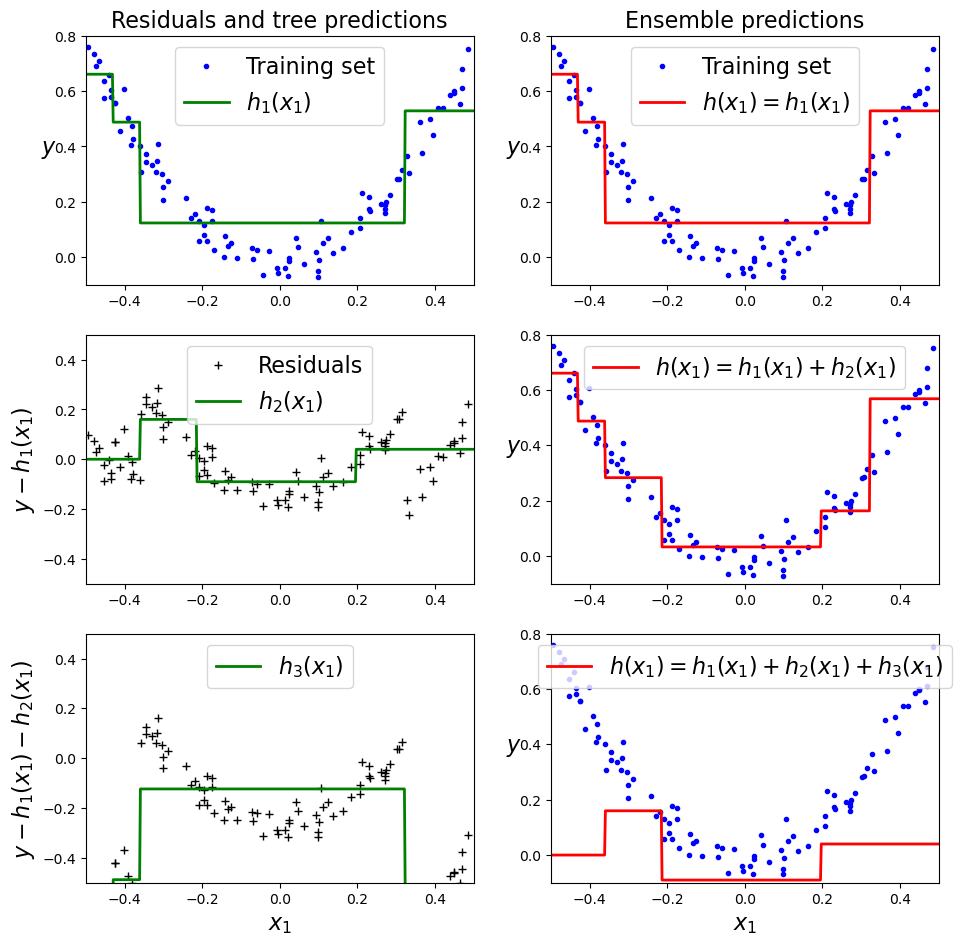

In [16]:
import matplotlib.pyplot as plt
def plot_predictions(regressors, X, y, axes, label=None, style="r-",
data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in
    regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
        plt.axis(axes)
plt.figure(figsize=(11,11))
plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8],
label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)
plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1)=h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)
plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5],
label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)
plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8],
label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5],
label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)
plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1,
0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.show()

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3,learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best =GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=84)

In [19]:
min_error = np.min(errors)
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

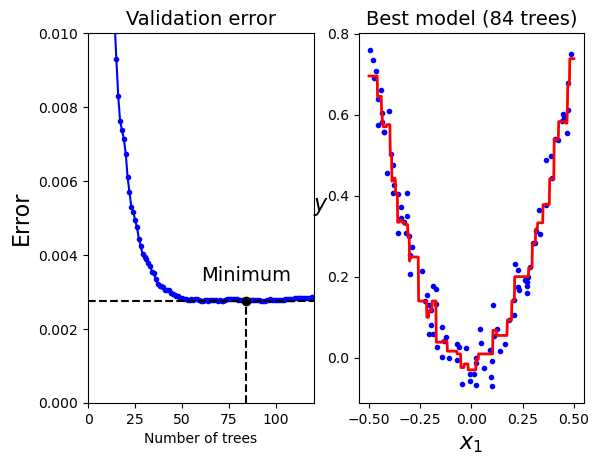

In [20]:
plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)
plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)
plt.show()

In [21]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping
print(gbrt.n_estimators)
print("Minimum validation MSE:", min_val_error)

69
Minimum validation MSE: 0.002750279033345716


In [22]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None
if xgboost is not None: # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred) # Not shown
    print("Validation MSE:", val_error) # Not shown
if xgboost is not None: # not shown in the book
    xgb_reg.fit(X_train, y_train,
    eval_set=[(X_val, y_val)], early_stopping_rounds=2)

    val_error = mean_squared_error(y_val, y_pred) # Not shown
    print("Validation MSE:", val_error) # Not shown
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None
%timeit GradientBoostingRegressor().fit(X_train, y_train)

Error: the xgboost library is not installed.
25.5 ns ± 1.95 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
30.5 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# 加载Fashion-MNIST数据集
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 将图像数据从(28, 28)形状转换为一维数组，并进行归一化
X_train = X_train.reshape(-1, 28 * 28) / 255.0
X_test = X_test.reshape(-1, 28 * 28) / 255.0

# 划分训练集、验证集和测试集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train, X_val = X_train.astype(np.float32), X_val.astype(np.float32)

In [24]:
# 定义分类器
rf_clf = RandomForestClassifier(random_state=42)
et_clf = ExtraTreesClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

# 训练分类器
rf_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

# 创建集成分类器，这里我们尝试软投票法
voting_clf_soft = VotingClassifier(estimators=[('rf', rf_clf), ('et', et_clf), ('svm', svm_clf)], voting='soft')

In [25]:
# 训练集成分类器
voting_clf_soft.fit(X_train, y_train)

# 在验证集上评估各个分类器以及集成分类器
print("Random Forest Accuracy: ", accuracy_score(y_val, rf_clf.predict(X_val)))
print("Extra Trees Accuracy: ", accuracy_score(y_val, et_clf.predict(X_val)))
print("SVM Accuracy: ", accuracy_score(y_val, svm_clf.predict(X_val)))
print("Voting Classifier (Soft Voting) Accuracy: ", accuracy_score(y_val, voting_clf_soft.predict(X_val)))

# 在测试集上测试集成分类器
test_accuracy = accuracy_score(y_test, voting_clf_soft.predict(X_test))
print("Voting Classifier (Soft Voting) Test Accuracy: ", test_accuracy)

Random Forest Accuracy:  0.88125
Extra Trees Accuracy:  0.8781666666666667
SVM Accuracy:  0.8893333333333333
Voting Classifier (Soft Voting) Accuracy:  0.8915
Voting Classifier (Soft Voting) Test Accuracy:  0.8826


In [26]:
# 获取各分类器对验证集的预测概率
rf_probs_val = rf_clf.predict_proba(X_val)
et_probs_val = et_clf.predict_proba(X_val)
svm_probs_val = svm_clf.predict_proba(X_val)

# 创建新的训练集（第一层分类器的预测概率）
new_X_train = np.hstack((rf_probs_val, et_probs_val, svm_probs_val))
new_y_train = y_val

# 定义并训练混合器（第二层分类器），这里假设我们使用逻辑回归作为混合器
stacking_clf = LogisticRegression(random_state=42)
stacking_clf.fit(new_X_train, new_y_train)

# 获取各分类器对测试集的预测概率
rf_probs_test = rf_clf.predict_proba(X_test)
et_probs_test = et_clf.predict_proba(X_test)
svm_probs_test = svm_clf.predict_proba(X_test)

# 创建新的测试集（第一层分类器的预测概率）
new_X_test = np.hstack((rf_probs_test, et_probs_test, svm_probs_test))

# 使用混合器对新的测试集进行预测
stacking_predictions = stacking_clf.predict(new_X_test)

# 在测试集上评估Stacking集成模型的性能
stacking_test_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Classifier Test Accuracy: ", stacking_test_accuracy)

D:\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Stacking Classifier Test Accuracy:  0.8827
